In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/_main_/GoForward_/i3D_model/1c3d_2016

/content/drive/My Drive/_main_/GoForward_/i3D_model/1c3d_2016


In [0]:
import os
import glob
import warnings
import random
from subprocess import check_output

import numpy as np
import pandas as pd
from PIL import Image

import cv2

In [0]:
def frames_show(arFrames:np.array, nWaitMilliSec:int = 1):

    nFrames, nHeight, nWidth, nDepth = arFrames.shape
    
    for i in range(nFrames):
        cv2.imshow("Frame", arFrames[i, :, :, :])
        key = cv2.waitKey(50)#pauses for 3 seconds before fetching next image
        if key == 27:#if ESC is pressed, exit loop
            break
            cv2.destroyAllWindows()
    cv2.destroyAllWindows()

In [5]:
from matplotlib.pyplot import imshow
im = cv2.imread("feymn.jpg")
print(im.shape)

(351, 656, 3)


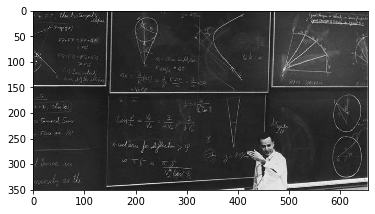

In [0]:
imshow(im)

In [0]:
def image_resize_aspectratio(arImage: np.array, nMinDim:int = 224) -> np.array:
    nHeigth, nWidth, _ = arImage.shape

    if nWidth >= nHeigth:
        # wider than high => map heigth to 224
        fRatio = nMinDim / nHeigth
    else: 
        fRatio = nMinDim / nWidth

    if fRatio != 1.0:
        arImage = cv2.resize(arImage, dsize = (0,0), fx = fRatio, fy = fRatio, interpolation=cv2.INTER_LINEAR)
    #print(arImage.shape)
    return arImage

In [0]:
def image_resize_aspectratio_(arImage: np.array, dims_:tuple = (224, 224)) -> np.array:
    arImage = cv2.resize(arImage, dims_,  interpolation=cv2.INTER_AREA)
    #print(arImage.shape)
    return arImage

(224, 419, 3)

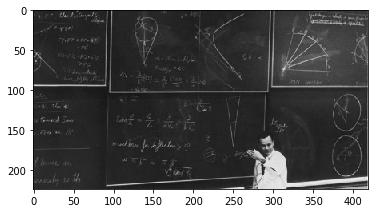

In [0]:
fey = image_resize_aspectratio(im, 224)
new_im = Image.fromarray(fey)
imshow(new_im)
fey.shape

In [0]:
arr = image_resize_aspectratio(im)
new_im = Image.fromarray(arr)
arr.shape

(224, 419, 3)

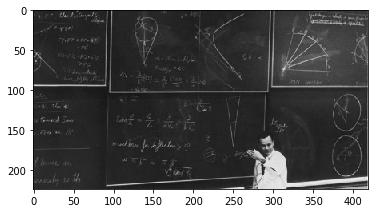

In [0]:
imshow(new_im)

In [0]:
def images_resize_aspectratio(arImages: np.array, nMinDim:int = 224) -> np.array:
    nImages, _, _, _ = arImages.shape
    liImages = []
    for i in range(nImages):
        arImage = image_resize_aspectratio(arImages[i, ...])
        liImages.append(arImage)
    return np.array(liImages)

In [0]:
def images_resize_aspectratio_(arImages:np.array, dims_:tuple = (224, 224)) -> np.array:
    nImages, _, _, _ = arImages.shape
    liImages = []
    for i in range(nImages):
        arImage = image_resize_aspectratio(arImages[i, ...])
        liImages.append(arImage)
    return np.array(liImages)

In [0]:
def video2tensor(sVideoPath:str, nResizeMinDim:int=224) -> np.array:
    """ Read video file with OpenCV and return array of frames
    The frame rate depends on the video (and cannot be set)

    if nMinDim != None: Frames are resized preserving aspect ratio 
        so that the smallest dimension is eg 256 pixels, with bilinear interpolation
    """
    
    # Create a VideoCapture object and read from input file
    oVideo = cv2.VideoCapture(sVideoPath)
    if (oVideo.isOpened() == False): raise ValueError("Error opening video file")

    liFrames = []

    # Read until video is completed
    while(True):
        
        (bGrabbed, arFrame) = oVideo.read()
        if bGrabbed == False: break

        if nResizeMinDim != None:
            # resize image
            arFrameResized = image_resize_aspectratio(arFrame, nResizeMinDim)

		# Save the resulting frame to list
        liFrames.append(arFrameResized)
   
    return np.array(liFrames)

In [0]:
def video2tensor_(sVideoPath:str, dims_:tuple = (224, 224)) -> np.array:
    """ Read video file with OpenCV and return array of frames
    The frame rate depends on the video (and cannot be set)

    if nMinDim != None: Frames are resized preserving aspect ratio 
        so that the smallest dimension is eg 256 pixels, with bilinear interpolation
    """
    
    # Create a VideoCapture object and read from input file
    oVideo = cv2.VideoCapture(sVideoPath)
    if (oVideo.isOpened() == False): raise ValueError("Error opening video file")

    liFrames = []

    # Read until video is completed
    while(True):
        
        (bGrabbed, arFrame) = oVideo.read()
        if bGrabbed == False: break

        arFrameResized = image_resize_aspectratio(arFrame, dims_)

        # Save the resulting frame to list
        liFrames.append(arFrameResized)
   
    return np.array(liFrames)

In [0]:
fr = video2tensor("data-set/chalearn/train\c191\M_33086.avi", 224)
fr.shape

ValueError: Error opening video file

In [0]:
fr = video2tensor("alex.mp4")
fr.shape

(120, 224, 407, 3)

In [0]:
frames = video2tensor("K_01801.avi", 256)
frames.shape

(56, 256, 341, 3)

In [0]:
def tensor2files(arFrames:np.array, sTargetDir:str):
    """ Write array of frames to jpg files
    Input: arFrames = (number of frames, height, width, depth)
    """
    os.makedirs(sTargetDir, exist_ok=True)
    for nFrame in range(arFrames.shape[0]):
        cv2.imwrite(sTargetDir + "/frame%04d.jpg" % nFrame, arFrames[nFrame, :, :, :])

In [0]:
#saves each frane (.jpg) into selected directory
tensor2files(fr, 'alex_256_256')

In [0]:
#saves each frane (.jpg) into selected directory
tensor2files(frames, 'frames2files_')

In [0]:
def dir2tensor(sPath:str) -> np.array:
    # important to sort image files upfront
    liFiles = sorted(glob.glob(sPath + "/*.jpg"))
    if len(liFiles) == 0: raise ValueError("No frames found in " + sPath)

    liFrames = []
    # loop through frames
    for sFramePath in liFiles:
        arFrame = cv2.imread(sFramePath)
        liFrames.append(arFrame)

    return np.array(liFrames)

In [0]:
ar = dir2tensor('alex_256_256/')
ar.shape

(120, 224, 407, 3)

In [0]:
frames2 = dir2tensor('files2frames_')
frames2.shape

ValueError: No frames found in files2frames_

In [0]:
def frames_downsample(arFrames:np.array, nFramesTarget:int) -> np.array:
    """ Adjust number of frames (eg 123) to nFramesTarget (eg 79)
    works also if originally less frames then nFramesTarget
    """

    nSamples, _, _, _ = arFrames.shape
    if nSamples == nFramesTarget: return arFrames

    # down/upsample the list of frames
    fraction = nSamples / nFramesTarget
    index = [int(fraction * i) for i in range(nFramesTarget)]
    liTarget = [arFrames[i,:,:,:] for i in index]
    #print("Change number of frames from %d to %d" % (nSamples, nFramesTarget))
    #print(index)

    return np.array(liTarget)

In [0]:
frames3 = frames_downsample(frames2, 60)
frames3.shape

NameError: name 'frames2' is not defined

In [0]:
frames_show(frames3)

In [0]:
def image_crop(arFrame, nHeightTarget, nWidthTarget) -> np.array:
    """ crop 1 frame to specified size, choose centered image
    """
    nHeight, nWidth, _ = arFrame.shape

    if (nHeight < nHeightTarget) or (nWidth < nWidthTarget):
        raise ValueError("Image height/width too small to crop to target size")

    # calc left upper corner
    sX = int(nWidth/2 - nWidthTarget/2)
    sY = int(nHeight/2 - nHeightTarget/2)

    arFrame = arFrame[sY:sY+nHeightTarget, sX:sX+nWidthTarget, :]

    return arFrame

In [0]:
frame1 = image_crop(fr[0], 224, 224)
frame1.shape

(224, 224, 3)

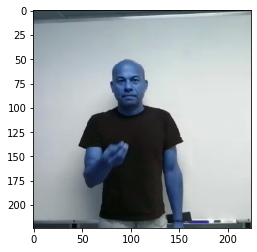

In [0]:
imshow(frame1)

In [0]:
def images_crop(arFrames:np.array, h_w_target = (224,224)) -> np.array:
    """ crop each frame in array to specified size, choose centered image
    """
    nSamples, nHeight, nWidth, nDepth = arFrames.shape
    nHeightTarget, nWidthTarget = h_w_target
    if (nHeight < nHeightTarget) or (nWidth < nWidthTarget):
        raise ValueError("Image height/width too small to crop to target size")

    # calc left upper corner
    sX = int(nWidth/2 - nWidthTarget/2)
    sY = int(nHeight/2 - nHeightTarget/2)

    arFrames = arFrames[:, sY:sY+nHeightTarget, sX:sX+nWidthTarget, :]

    return arFrames

In [0]:
frames4 = images_crop(frames3, (224, 224))
frames4.shape

(60, 224, 224, 3)

In [0]:
frames_show(frames4)

In [0]:
def images_rescale(arFrames:np.array) -> np.array(float):
    """ Rescale array of images (rgb 0-255) to [-1.0, 1.0]
    """

    ar_fFrames = arFrames / 127.5
    ar_fFrames -= 1.

    return ar_fFrames

In [0]:
frames5 = images_rescale(frames4)
frames5.shape

(60, 224, 224, 3)

In [0]:
frames_show(frames5)

In [0]:
def images_normalize(arFrames:np.array, nFrames:int, h_w_target:tuple, bRescale:bool = True) -> np.array(float):
    """ Several image normalizations/preprocessing: 
        - downsample number of frames
        - crop to centered image
        - rescale rgb 0-255 value to [-1.0, 1.0] - only if bRescale == True

    Returns array of floats
    """

    # normalize the number of frames (assuming typically downsampling)
    arFrames = frames_downsample(arFrames, nFrames)

    # crop to centered image
    arFrames = images_crop(arFrames, h_w_target)

    if bRescale:
        # normalize to [-1.0, 1.0]
        arFrames = images_rescale(arFrames)
    else:
        if np.max(np.abs(arFrames)) > 1.0: warnings.warn("Images not normalized")

    return arFrames


In [0]:
frames6 = images_normalize(frames4, 60, (224, 224), bRescale=True)
frames6.shape

(60, 224, 224, 3)

In [0]:
frames_show(frames6)

In [0]:
def frames_show(arFrames:np.array, nWaitMilliSec:int = 1):

    nFrames, nHeight, nWidth, nDepth = arFrames.shape
    
    for i in range(nFrames):
        cv2.imshow("Frame", arFrames[i, :, :, :])
        key = cv2.waitKey(50)#pauses for 3 seconds before fetching next image
        if key == 27:#if ESC is pressed, exit loop
            break
            cv2.destroyAllWindows()
    cv2.destroyAllWindows()

In [0]:
frames_show(frames6)

In [0]:
def video_length(sVideoPath):
    v=cv2.VideoCapture(sVideoPath)
    v.set(cv2.CAP_PROP_POS_AVI_RATIO,1)
    return v.get(cv2.CAP_PROP_POS_MSEC)/1000

In [0]:
video_length('alex.mp4')

4.0

In [0]:
sVideoDir = r'videos/poses_b'
sFrameDir = r'videos/poses_b_frames'
nFramesNorm = 80
nResizeMinDim:int = 224
tuCropShape = (224, 224)
nClasses:int = 1

In [0]:
sVids = sVideoDir
dfVideos = pd.DataFrame(sorted(glob.glob(sVids + '/*')), columns=["sVideoPath"])
if len(dfVideos) == 0: raise ValueError("No videos found")
dfVideos

,sVideoPath
0,videos/poses_b\alex_buenosDias_bPose.mp4
1,videos/poses_b\ces_buenosDias_bPose.mp4
2,videos/poses_b\deya_buenosDias_bPose.mp4
3,videos/poses_b\ian_buenosDias_bPose.mp4
4,videos/poses_b\ivan_buenosDias_bPose.mp4
5,videos/poses_b\karen_buenosDias_bPose.mp4


In [0]:
dfVideos.sVideoPath

0     videos/poses_b\alex_buenosDias_bPose.mp4
1      videos/poses_b\ces_buenosDias_bPose.mp4
2     videos/poses_b\deya_buenosDias_bPose.mp4
3      videos/poses_b\ian_buenosDias_bPose.mp4
4     videos/poses_b\ivan_buenosDias_bPose.mp4
5    videos/poses_b\karen_buenosDias_bPose.mp4
Name: sVideoPath, dtype: object

In [0]:
dw1 = dfVideos.sVideoPath.apply(lambda s: "\\".join(s.split('/')).split("\\"))
dw1

0     [videos, poses_b, alex_buenosDias_bPose.mp4]
1      [videos, poses_b, ces_buenosDias_bPose.mp4]
2     [videos, poses_b, deya_buenosDias_bPose.mp4]
3      [videos, poses_b, ian_buenosDias_bPose.mp4]
4     [videos, poses_b, ivan_buenosDias_bPose.mp4]
5    [videos, poses_b, karen_buenosDias_bPose.mp4]
Name: sVideoPath, dtype: object

In [0]:
# eventually restrict to first nLabels
if nClasses != None:
    dfVideos.loc[:,"sLabel"] = dfVideos.sVideoPath.apply(lambda s: s.split("/")[-2])
    liClasses = sorted(dfVideos.sLabel.unique())[:nClasses]
    dfVideos = dfVideos[dfVideos["sLabel"].isin(liClasses)]
    print("Using only {} videos from first {} classes".format(len(dfVideos), nClasses))

In [0]:
def videosDir2framesDir(sVideoDir:str, 
                        sFrameDir:str, 
                        nFramesNorm:int = None, 
                        nResizeMinDim:int = None, 
                        tuCropShape:tuple = None, 
                        nClasses:int = None):
    
    """ Extract frames from videos 
    
    Input video structure:
    ... sVideoDir / train / class001 / videoname.avi

    Output:
    ... sFrameDir / train / class001 / videoname / frames.jpg
    """

    # do not (partially) overwrite existing frame directory
    #if os.path.exists(sFrameDir): 
    #    warnings.warn("Frame folder " + sFrameDir + " already exists, frame extraction stopped")
    #    return 

    # get videos. Assume sVideoDir / train / class / video.mp4
    dfVideos = pd.DataFrame(sorted(glob.glob(sVideoDir + "/*.*")), columns=["sVideoPath"])
    print("Located {} videos in {}, extracting to {} ...".format(len(dfVideos), sVideoDir, sFrameDir))
    if len(dfVideos) == 0: raise ValueError("No videos found")

    # eventually restrict to first nLabels
    if nClasses != None:
        dfVideos.loc[:,"sLabel"] = dfVideos.sVideoPath.apply(lambda s: s.split("/")[-2])
        liClasses = sorted(dfVideos.sLabel.unique())[:nClasses]
        dfVideos = dfVideos[dfVideos["sLabel"].isin(liClasses)]
        print("Using only {} videos from first {} classes".format(len(dfVideos), nClasses))

    nCounter = 0
    # loop through all videos and extract frames
    for sVideoPath in dfVideos.sVideoPath:
        print("sVideoPath:", sVideoPath)

        # assemble target diretory (assumed directories see above)
        nSlash = sFrameDir.count("/")
        li_sVideoPath = sVideoPath.split("/")
        li_sFramePath = sFrameDir.split("/")
        #if len(li_sVideoPath) < 4: raise ValueError("Video path should have min 4 components: {}".format(str(li_sVideoPath)))
        sVideoName = li_sVideoPath[-1].split(".")[0]
        if nSlash==0: raise ValueError("Video path should have min 2 component: {}".format(str(li_sVideoPath)))
                                                                                           
        if nSlash==1:
            sTargetDir = "{}/{}".format(sFrameDir, sVideoName)
            print('sTargetDir:',sTargetDir, 1)
        elif nSlash>1:
            sTargetDir = "{}/{}".format(sFrameDir, sVideoName)
            print('sTargetDir:',sTargetDir, 1)
        print()
        #sTargetDir = sFrameDir + "/" + li_sVideoPath[-3] + "/" + li_sVideoPath[-2] + "/" + sVideoName
        
        # check if frames already extracted
        if nFramesNorm != None and os.path.exists(sTargetDir):
            nFrames = len(glob.glob(sTargetDir + "/*.*"))
            if nFrames == nFramesNorm: 
                print("Video %5d already extracted to %s" % (nCounter, sTargetDir))
                nCounter += 1
                continue
            else: 
                print("Video %5d: Directory with %d instead of %d frames detected" % (nCounter, nFrames, nFramesNorm))
        
        # create target directory
        os.makedirs(sTargetDir, exist_ok = True)

        # slice videos into frames with OpenCV
        arFrames = video2tensor(sVideoPath, nResizeMinDim)

        # length and fps
        fVideoSec = video_length(sVideoPath)
        nFrames = len(arFrames)
        fFPS = nFrames / fVideoSec   

        # downsample
        if nFramesNorm != None: 
            arFrames = frames_downsample(arFrames, nFramesNorm)

        # crop images
        if tuCropShape != None:
            arFrames = images_crop(arFrames, tuCropShape)
        
        # write frames to .jpg files
        tensor2files(arFrames, sTargetDir)         

        #print("Video %5d|%5.1f sec|%d frames|%4.1f fps|saved %s in %s" % (nCounter, fVideoSec, nFrames, fFPS, str(arFrames.shape), sTargetDir))
        nCounter += 1

In [0]:
#videosDir2framesDir("videos/poses_c/", 'videos/', nResizeMinDim=60)

In [22]:
import os
clases = os.listdir('data-set/chalearn_vid/valid')
print(clases[:3])

['c001', 'c002', 'c003']


In [25]:
for i in clases[:3]:
    videosDir2framesDir(sVideoDir = 'data-set/chalearn_vid/train/{}'.format(i), 
                        sFrameDir = 'data-set/chalearn_img/train/{}'.format(i),
                        nFramesNorm = 120,
                        nResizeMinDim = 224,
                        tuCropShape = (224, 224))
    print()

Located 20 videos in data-set/chalearn_vid/train/c001, extracting to data-set/chalearn_img/train/c001 ...
sVideoPath: data-set/chalearn_vid/train/c001/bd_alex.mp4
sTargetDir: data-set/chalearn_img/train/c001/bd_alex 1

Video     0: Directory with 40 instead of 120 frames detected
sVideoPath: data-set/chalearn_vid/train/c001/bd_angelo.mp4
sTargetDir: data-set/chalearn_img/train/c001/bd_angelo 1

Video     1: Directory with 40 instead of 120 frames detected
sVideoPath: data-set/chalearn_vid/train/c001/bd_anth.mp4
sTargetDir: data-set/chalearn_img/train/c001/bd_anth 1

Video     2: Directory with 40 instead of 120 frames detected
sVideoPath: data-set/chalearn_vid/train/c001/bd_ariel.mp4
sTargetDir: data-set/chalearn_img/train/c001/bd_ariel 1

Video     3: Directory with 40 instead of 120 frames detected
sVideoPath: data-set/chalearn_vid/train/c001/bd_ces.mp4
sTargetDir: data-set/chalearn_img/train/c001/bd_ces 1

Video     4: Directory with 40 instead of 120 frames detected
sVideoPath: dat

In [26]:
for i in clases[:3]:
    videosDir2framesDir(sVideoDir = 'data-set/chalearn_vid/valid/{}'.format(i), 
                        sFrameDir = 'data-set/chalearn_img/valid/{}'.format(i),
                        nFramesNorm = 120,
                        nResizeMinDim = 224,
                        tuCropShape = (224, 224))
    print()

Located 5 videos in data-set/chalearn_vid/valid/c001, extracting to data-set/chalearn_img/valid/c001 ...
sVideoPath: data-set/chalearn_vid/valid/c001/bd_nayeska.mp4
sTargetDir: data-set/chalearn_img/valid/c001/bd_nayeska 1

sVideoPath: data-set/chalearn_vid/valid/c001/bd_paul.mp4
sTargetDir: data-set/chalearn_img/valid/c001/bd_paul 1

sVideoPath: data-set/chalearn_vid/valid/c001/bd_rd1.mp4
sTargetDir: data-set/chalearn_img/valid/c001/bd_rd1 1

sVideoPath: data-set/chalearn_vid/valid/c001/bd_val.mp4
sTargetDir: data-set/chalearn_img/valid/c001/bd_val 1

sVideoPath: data-set/chalearn_vid/valid/c001/bd_yairy.mp4
sTargetDir: data-set/chalearn_img/valid/c001/bd_yairy 1


Located 4 videos in data-set/chalearn_vid/valid/c002, extracting to data-set/chalearn_img/valid/c002 ...
sVideoPath: data-set/chalearn_vid/valid/c002/bt_rd1.mp4
sTargetDir: data-set/chalearn_img/valid/c002/bt_rd1 1

Video     0: Directory with 40 instead of 120 frames detected
sVideoPath: data-set/chalearn_vid/valid/c002/bt

In [0]:
def unittest(sVideoDir, nSamples = 100):
    print("\nAnalyze video durations and fps from %s ..." % (sVideoDir))
    print(os.getcwd())

    liVideos = glob.glob(sVideoDir + "/*.mp4") + glob.glob(sVideoDir + "/*.avi")
    
    if len(liVideos) == 0: raise ValueError("No videos detected")

    fVideoSec_sum, nFrames_sum = 0, 0
    for i in range(nSamples):
        sVideoPath = random.choice(liVideos)
        #print("Video %s" % sVideoPath)

        # read video
        arFrames = video2frames(sVideoPath, 224)
        nFrames = len(arFrames)

        # determine length of video in sec and deduce frame rate
        fVideoSec = video_length(sVideoPath)
        fFPS = nFrames / fVideoSec

        fVideoSec_sum += fVideoSec
        nFrames_sum += nFrames

        print("%2d: Shape %s, duration %.1f sec, fps %.1f" % (i, str(arFrames.shape), fVideoSec, fFPS))

    nCount = i+1
    print("%d samples: Average video duration %.1f sec, fps %.1f" % (nSamples, fVideoSec_sum / nCount, nFrames_sum / fVideoSec_sum))

In [0]:
unittest('videos/poses_b', 5)


Analyze video durations and fps from videos/poses_b ...
C:\Users\JaimePanchana\Desktop\Jean\2go\python\1c3d_2016
 0: Shape (120, 224, 467, 3), duration 4.0 sec, fps 30.0
 1: Shape (120, 224, 407, 3), duration 4.0 sec, fps 30.0
 2: Shape (120, 224, 407, 3), duration 4.0 sec, fps 30.0
 3: Shape (120, 224, 407, 3), duration 4.0 sec, fps 30.0
 4: Shape (120, 224, 407, 3), duration 4.0 sec, fps 30.0
5 samples: Average video duration 4.0 sec, fps 30.0


In [0]:
import shutil
shutil.copy("info.txt", "no2much")

'no2much\\info.txt'

In [0]:
import shutil
shutil.copytree("log", "no2much/log")

'no2much/log'

In [0]:
#unittest("data-set/04-chalearn/010/train", 100)

In [0]:
import keras